In [30]:
%matplotlib inline


# Colours

In this exercise, we explore the main colour systems in image processing. Colour images are often represented in RGB, i.e., 3 layers of 2D arrays: (R)ed, (G)reen and (B)lue channels of the image. Other systems to represent colours are also used. For instance, HSV (Hue, Saturation, Value) or CIE 1931 color space (XYZ).

# 1. Importing libraries

matplotlib. Plotting signals.
skimage. Image processing.

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import io
from skimage import color
from skimage import img_as_float

# 2. Loading an image

Exploring the data type of the image and its shape. Each of the three matrix corresponds to one of the RGB channels.

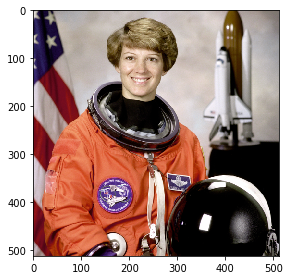

In [32]:
img=data.astronaut()
io.imshow(img)

In [33]:
print(img)

[[[154 147 151]
  [109 103 124]
  [ 63  58 102]
  ...
  [127 120 115]
  [120 117 106]
  [125 119 110]]

 [[177 171 171]
  [144 141 143]
  [113 114 124]
  ...
  [127 118 112]
  [124 115 108]
  [121 116 105]]

 [[201 194 193]
  [182 178 175]
  [168 165 164]
  ...
  [128 120 117]
  [126 116 112]
  [124 114 109]]

 ...

 [[186 170 176]
  [186 170 177]
  [183 168 170]
  ...
  [  0   0   0]
  [  0   0   1]
  [  0   0   0]]

 [[183 169 170]
  [182 167 171]
  [185 164 176]
  ...
  [  0   0   1]
  [  1   1   1]
  [  0   0   0]]

 [[184 167 172]
  [183 165 169]
  [180 162 171]
  ...
  [  0   0   0]
  [  1   1   1]
  [  0   0   0]]]


In [34]:
print(img.shape)

(512, 512, 3)


# 3. Converting the image data type: from 0-255 to 0-1

Using img_as_float, the value of intensity of the pixels are mapped from the uint8 type (0-255) to float (0-1).

In [35]:
img = img_as_float(img)

print(img)

[[[0.60392157 0.57647059 0.59215686]
  [0.42745098 0.40392157 0.48627451]
  [0.24705882 0.22745098 0.4       ]
  ...
  [0.49803922 0.47058824 0.45098039]
  [0.47058824 0.45882353 0.41568627]
  [0.49019608 0.46666667 0.43137255]]

 [[0.69411765 0.67058824 0.67058824]
  [0.56470588 0.55294118 0.56078431]
  [0.44313725 0.44705882 0.48627451]
  ...
  [0.49803922 0.4627451  0.43921569]
  [0.48627451 0.45098039 0.42352941]
  [0.4745098  0.45490196 0.41176471]]

 [[0.78823529 0.76078431 0.75686275]
  [0.71372549 0.69803922 0.68627451]
  [0.65882353 0.64705882 0.64313725]
  ...
  [0.50196078 0.47058824 0.45882353]
  [0.49411765 0.45490196 0.43921569]
  [0.48627451 0.44705882 0.42745098]]

 ...

 [[0.72941176 0.66666667 0.69019608]
  [0.72941176 0.66666667 0.69411765]
  [0.71764706 0.65882353 0.66666667]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.00392157]
  [0.         0.         0.        ]]

 [[0.71764706 0.6627451  0.66666667]
  [0.71372549 0.65490196 0.67058824]


# 4. Playing with RGB channels

In [36]:
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 10), sharex=True, sharey=True)
ax1.imshow(r, cmap='gray')
ax2.imshow(g, cmap='gray')
ax3.imshow(b, cmap='gray')
ax1.set_adjustable('box-forced')
ax2.set_adjustable('box-forced')
ax3.set_adjustable('box-forced')

ValueError: 'box-forced' is not a valid value for adjustable; supported values are 'box', 'datalim'

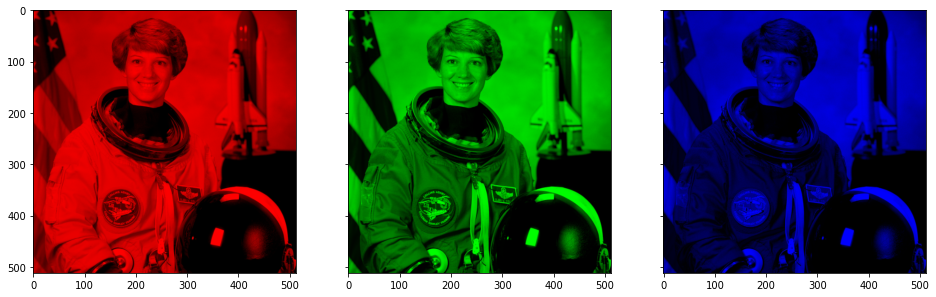

In [28]:
# Building a colour image using only one of the channels

red_image = np.zeros((512, 512, 3))
red_image[:,:,0] = r
red_image[:,:,1] = np.zeros((512, 512))
red_image[:,:,2] = np.zeros((512, 512))

green_image = np.zeros((512, 512, 3))
green_image[:,:,0] = np.zeros((512, 512))
green_image[:,:,1] = g
green_image[:,:,2] = np.zeros((512, 512))

blue_image = np.zeros((512, 512, 3))
blue_image[:,:,0] = np.zeros((512, 512))
blue_image[:,:,1] = np.zeros((512, 512))
blue_image[:,:,2] = b

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 10), sharex=True, sharey=True)
ax1.imshow(red_image)
ax2.imshow(green_image)
ax3.imshow(blue_image)
ax1.set_adjustable('box')
ax2.set_adjustable('box')
ax3.set_adjustable('box')


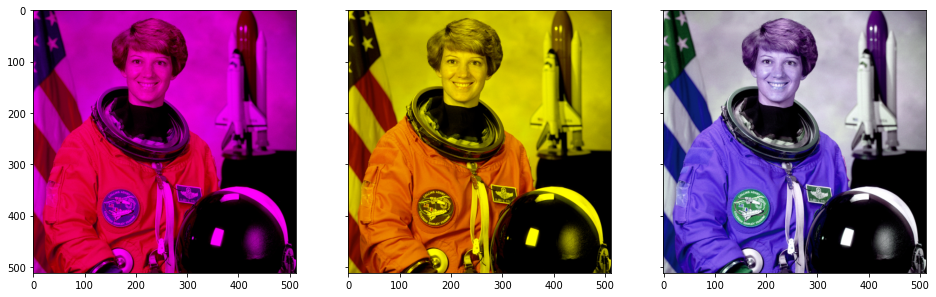

In [22]:
# Mixing channels

purple_image = np.zeros((512, 512, 3))
purple_image[:,:,0] = r
purple_image[:,:,2] = b

yellow_image = np.zeros((512, 512, 3))
yellow_image[:,:,0] = r
yellow_image[:,:,1] = g

mixed_image = np.zeros((512, 512, 3))
mixed_image[:,:,0]=g
mixed_image[:,:,1]=b
mixed_image[:,:,2]=r

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 10), sharex=True, sharey=True)
ax1.imshow(purple_image)
ax2.imshow(yellow_image)
ax3.imshow(mixed_image)
ax1.set_adjustable('box')
ax2.set_adjustable('box')
ax3.set_adjustable('box')

# 5. Mapping onto a different colour system

As an example, the representation of the original image in a different colour system will be obtained. In this example, the converion from RGB to XYZ is obtained. The new channels are explored.

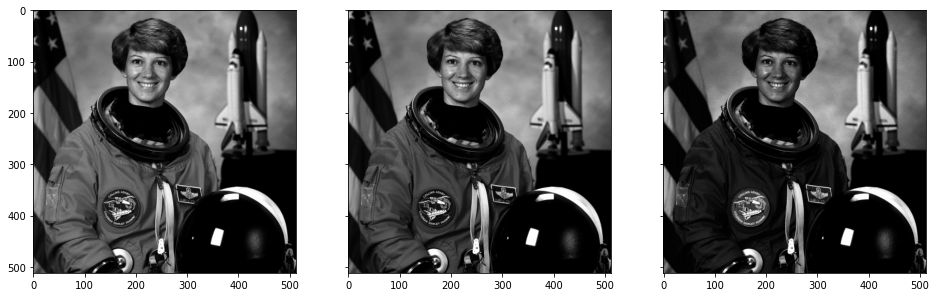

In [29]:
# From RGB to XYZ
img_xyz = color.rgb2xyz(img)

# Extracting the channels
x = img_xyz[:,:,0]
y = img_xyz[:,:,1]
z = img_xyz[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 10), sharex=True, sharey=True)
ax1.imshow(x, cmap='gray')
ax2.imshow(y, cmap='gray')
ax3.imshow(z, cmap='gray')
ax1.set_adjustable('box')
ax2.set_adjustable('box')
ax3.set_adjustable('box')

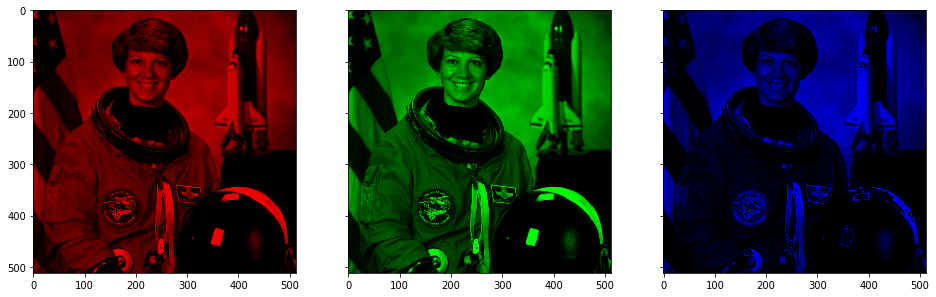

In [90]:
# Exploring the channels of the XYZ image

x_image = np.zeros((512, 512, 3))
x_image[:,:,0] = x
x_image[:,:,1] = np.zeros((512, 512))
x_image[:,:,2] = np.zeros((512, 512))

y_image = np.zeros((512, 512, 3))
y_image[:,:,0] = np.zeros((512, 512))
y_image[:,:,1] = y
y_image[:,:,2] = np.zeros((512, 512))

z_image = np.zeros((512, 512, 3))
z_image[:,:,0] = np.zeros((512, 512))
z_image[:,:,1] = np.zeros((512, 512))
z_image[:,:,2] = z

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 10), sharex=True, sharey=True)
ax1.imshow(x_image, cmap='gray')
ax2.imshow(y_image, cmap='gray')
ax3.imshow(z_image, cmap='gray')
ax1.set_adjustable('box')
ax2.set_adjustable('box')
ax3.set_adjustable('box')